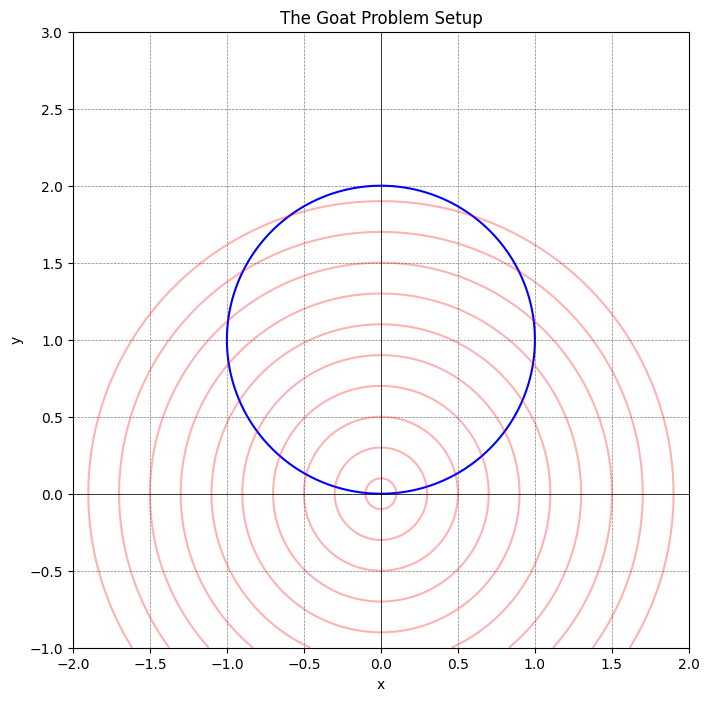

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the scenario for the Goat Problem
def plot_goat_problem():
    # Create a grid of points for plotting
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)

    # Equations of the circles
    circle_fence = (X-0)**2 + (Y-1)**2 - 1**2

    # Plot the fence circle
    plt.figure(figsize=(8, 8))
    plt.contour(X, Y, circle_fence, levels=[0], colors='blue')

    # Plot the goat circle for a range of r values just to get the idea
    for r in np.linspace(0.1, 1.9, 10):
        plt.contour(X, Y, X**2 + Y**2 - r**2, levels=[0], colors='red', alpha=0.3)

    # Formatting the plot
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.title("The Goat Problem Setup")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(-2, 2)
    plt.ylim(-1, 3)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

# Plot the scenario
plot_goat_problem()


from scipy.optimize import fsolve

# Define the function to find the intersection points
def intersection_points(r):
    # Equation of the circle centered at (0,1)
    def circle_fence(x, y):
        return (x - 0)**2 + (y - 1)**2 - 1**2
    
    # Equation of the circle centered at (0,0) with radius r
    def circle_goat(x, y):
        return x**2 + y**2 - r**2
    
    # The system of equations representing the intersection points
    def equations(p):
        x, y = p
        return (circle_fence(x, y), circle_goat(x, y))
    
    # Initial guess for the intersection points
    initial_guess = (r / 2, r / 2)
    point_A, point_B = fsolve(equations, initial_guess), fsolve(equations, (-initial_guess[0], initial_guess[1]))
    return point_A, point_B

# Test the function for a value of r
r_test = 1.5
intersection_points_A, intersection_points_B = intersection_points(r_test)
intersection_points_A, intersection_points_B


from scipy.integrate import quad

# Function to calculate the area under the curve of the goat's circle
def goat_circle_area(x, r):
    return np.sqrt(r**2 - x**2)

# Function to calculate the area under the curve of the fence's circle
def fence_circle_area(x):
    return np.sqrt(1 - (x - 0)**2) + 1

# Function to calculate the area difference between the two circles
def area_difference(r):
    # Find the intersection points for the current r
    point_A, point_B = intersection_points(r)
    
    # Integrate the area under the goat's circle curve between A and B
    area_goat, _ = quad(goat_circle_area, point_A[0], point_B[0], args=(r))
    
    # Integrate the area under the fence's circle curve between A and B
    area_fence, _ = quad(fence_circle_area, point_A[0], point_B[0])
    
    # The total area available for the goat to graze is the area under the goat's circle
    # minus the area under the fence's circle
    total_grazed_area = area_goat - (area_fence - 1)  # Subtract the fence's circle area above x-axis
    
    # The difference we want to find is between the grazed area and half the area of the fenced region
    half_fence_area = np.pi / 2
    difference = total_grazed_area - half_fence_area
    return difference

# Function to find the optimal r using a numerical root-finding method
def find_optimal_r():
    # Initial guess for r
    r_initial_guess = 1.0
    optimal_r_solution = fsolve(area_difference, r_initial_guess)
    return optimal_r_solution[0]

# Calculate the optimal r
optimal_r = find_optimal_r()
optimal_r
